##### Евклидово расстояние между двумя точками

Обычное евклидово расстояние между точками (x1, y1) и (x2, y2):  
sqrt((x2-x1)^2+(y2-y1)^2)

##### Манхеттенское расстояние между точками (x1, y1) и (x2, y2):  
|x1-x2|+|y1-y2|

##### Алгоритм Евклида (НОД, НОК) 
(алгоритм для нахождения наибольшего общего делителя двух целых чисел (или общей меры двух отрезков))

In [2]:
# НОД (наибольший общий делитель)
def gcd(a, b): 
    while b != 0: 
        a, b = b, a % b 
    return a

#
print(gcd(30, 12))

6


НОД трех и более целых чисел  
НОД(a,b,c)=НОД(НОД(a,b),c)

In [3]:
# НОК (наименьшее общее кратное)
def lcm(a, b):
    return (a * b) // gcd(a, b)

#
print(lcm(6, 8))

24


##### Сумма элементов списка (рекурсивный метод)

In [ ]:
def sm(seq):
    if seq:
        return seq[0] + sm(seq[1:])
    return 0

sm([1, 2, 3, 4, 5, 6, 7, 8])

##### Циклическая очередь

In [8]:
class CQueue:
    def __init__(self, arr):
        self.arr = arr

    def __getitem__(self, idx):
        return self.arr[(idx) % len(self.arr)]
    
# tests
alph = 'abcdefghijklmnopqrstuvwxyz'
c = CQueue(alph)
print(c[0])
print(c[25])
print(c[26])
print(c[-1])
print(c[-50])

a
z
a
z
c


In [9]:
'''
    idx - элемент
    n - на сколько сдвинуть (может быть отрицательным - в обратную сторону)
'''
def cycle_qu(arr, el, n):
    ln = len(arr)
    idx = arr.index(el)
    return arr[(idx+n) % ln]


# tests
alph = 'abcdefghijklmnopqrstuvwxyz'
print(cycle_qu(alph, 'a', 3))   # d
print(cycle_qu(alph, 'a', -3))  # x
print(cycle_qu(alph, 'a', 26))  # a
print(cycle_qu(alph, 'a', 0))   # a
print(cycle_qu(alph, 'z', 1))   # a

d
x
a
a
a


##### Простые числа

In [ ]:
'''
    Является ли число простым (делящееся на 1 и самого себя)
'''
def is_prime(n):
    if n <= 1:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True 


# test
print(is_prime(3))    # True
print(is_prime(6))    # False
print(is_prime(17))   # True
print(is_prime(100))  # False

In [14]:
'''
    Получение простых множителей числа.
    Простой множитель встречается в списке столько раз, какова его степень в разложении числа n.
'''
def get_factors(n):
    res = []
    k = int((n**0.5) // 1)
    for i in range(2, k+1):
        while n%i == 0:
            res.append(i)
            n //= i
    if n >= 1:
        res.append(n)
    return res

# tests
print(get_factors(10))
print(get_factors(1))
print(get_factors(2))
print(get_factors(3))
print(get_factors(17))
print(get_factors(100))


[2, 5]
[1]
[2]
[3]
[17]
[2, 2, 5, 5, 1]


In [15]:
'''
    Решето Эратосфена
    (алгоритм нахождения простых чисел до заданного натурального числа путем постепенного отсеивания составных чисел)
'''
def erat(n):
    primes = [i for i in range(n+1)]

    i = 2
    while i <= n:
        if primes[i] != 0:
            j = i + i
            while j <= n:
                primes[j] = 0
                j = j + i
        i += 1

    primes = [i for i in primes if i != 0]
    return primes

# test
print(erat(30))

[1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29]


##### Комбинаторика

In [17]:
'''
    Количество перестановок
    ( вычисляется по формуле P(n) = n! )
'''
def P(n):
    if n == 1:
        return 1
    return n * P(n-1)

#
print(P(1))
print(P(3))
print(P(5))
print(P(10))

1
6
120
3628800


In [21]:
'''
    Количество перестановок с повторениями
    ( вычисляется по формуле _P(n1, n2, ..., nk) = n! / (n1! * n2! * ... * nk!) 
    (n1, n2, ..., nk) - количество типов обектов)
'''
def _P(n1, n2, n3):
    return int(P(n1 + n2 + n3) / (P(n1) * P(n2) * P(n3)))

'''
    Сколькими способами можно собрать гирлянду из 4 красных, 4 синих и 8 желтых флажков?
'''
print(_P(4, 4, 8))

900900


In [19]:
'''
    Количество сочетаний (без повторения)
    (вычисляется по формуле C(n, k) = n! / k! * (n-k)! (из n объектов по k))
'''
def C(n, k):
    return P(n) / (P(k) * P(n-k))

# 
print(int(C(10, 2)))

45


In [22]:
'''
    Количество сочетаний (с повторением)
    (вычисляется по формуле C(n, k) = (k+n-1)! / ((n-1)! * k! ) (из n объектов по k))
'''
def _C(n, k):
    return int(P(k+n-1) / (P(n-1) * P(k)))

# 
print(_C(4, 3))

20


##### Матрицы

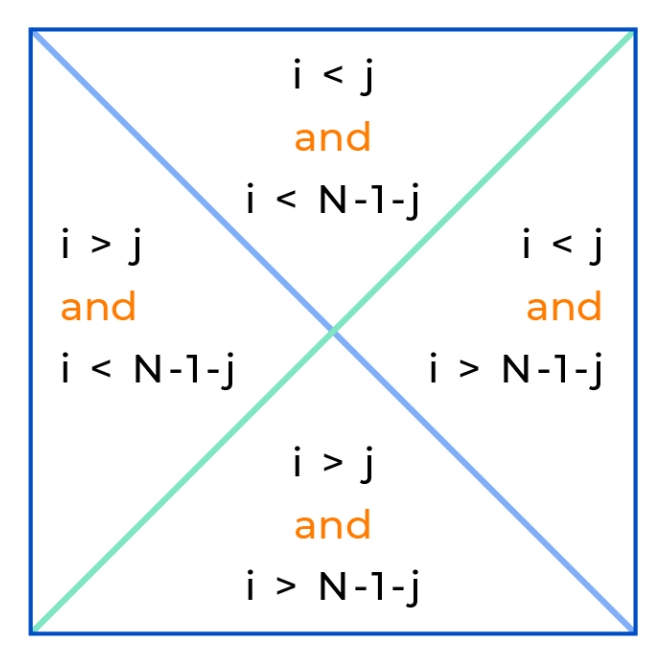

In [6]:
'''
    Произведение двух матриц
    O (n^3)
'''
def mulAB(A, B):
    nA = len(A)
    mA = len(A[0])
    nB = len(B)
    mB = len(B[0])

    # result Matrix -> nA x mB
    C = [[0]*mB for _ in range(nA)]
    for i in range(nA):
        for j in range(mB):
            for k in range(mA):
                C[i][j] += A[i][k] * B[k][j]
    return C

#
print(mulAB([[1, 4], [3, 9], [8, 6]], [[1, 6], [2, 9]]))

[[9, 42], [21, 99], [20, 102]]


In [38]:
'''
    Заполнение матрицы n x m по диагоналям.
'''
def main(n, m):
    res = [[0] * m for _ in range(n)]

    value = 0
    for diag in range(n + m - 1):
        for i in range(n):
            j = diag - i
            if 0 <= j < m:
                res[i][j] = value
                value += 1
    return res

#
for r in main(10, 10):
    for c in r:
        print(f'{c:3}', end='')
    print()


  0  1  3  6 10 15 21 28 36 45
  2  4  7 11 16 22 29 37 46 55
  5  8 12 17 23 30 38 47 56 64
  9 13 18 24 31 39 48 57 65 72
 14 19 25 32 40 49 58 66 73 79
 20 26 33 41 50 59 67 74 80 85
 27 34 42 51 60 68 75 81 86 90
 35 43 52 61 69 76 82 87 91 94
 44 53 62 70 77 83 88 92 95 97
 54 63 71 78 84 89 93 96 98 99


In [ ]:
'''
    Подсчет сумм элементов секторов матрицы.
'''
def sum_sectors(matrix: list[list]):
    k = len(matrix)
    N = 0 # north
    S = 0 # south
    W = 0 # west
    E = 0 # east
    for i in range(k):
        for j in range(k):
            if ((i > j) and (i < k - 1 - j)):
                W += matrix[i][j]
            elif ((i < j) and (i < k - 1 - j)):
                N += matrix[i][j]
            elif ((i < j) and (i > k - 1 - j)):
                E += matrix[i][j]
            elif ((i > j) and (i > k - 1 - j)):
                S += matrix[i][j]
    return N, E, S, W


N, E, S, W = sum_sectors([
[1, 4, 3, 4, 7],
[5, 6, 7, 8, 4],
[3, 8, 5, 6, 1],
[1, 2, 9, 4, 8],
[5, 6, 1, 5, 8]])
print(f'Верхняя четверть: {N}')
print(f'Правая четверть: {E}')
print(f'Нижняя четверть: {S}')
print(f'Левая четверть: {W}')

Верхняя четверть: 18
Правая четверть: 19
Нижняя четверть: 21
Левая четверть: 17


##### Системы счисления

In [33]:
# перевод из 10-ой в любую систему не более 16-ой
def dec_2_base(n, base):
    if base < 2: return '-'
    res = []
    d = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 
         8: '8', 9: '9', 10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f'}

    while n:
        res.append(d[n % base])
        n //= base
    return ''.join(res[::-1])

for b in range(2, 17):
    n = 2025
    print(f'{n} in {b:>2}-base is {dec_2_base(n, b)}')

b1


In [36]:
# перевод из любой системы счисления не более 16-ой в 10-ую
def base_2_dec(n, base):
    d = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7,
         '8': 8, '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15}

    n = str(n)
    sm = 0
    for i in range(len(n)-1, -1, -1):
        k = d[n[i]]
        if k >= base: return '-'
        sm += k * (base**(-i+len(n)-1))

    return sm

#
print(base_2_dec('10110', 2))
print(base_2_dec('256', 10))
print(base_2_dec('ffff', 16))

22
256
65535
79


##### Квадратное уравнение

ax² + bx + c = 0

In [1]:
# Решение квадратного уравнения
def quad_equ(a, b, c):
    res = 'No solution'
    if a == 0:
        if b == 0:
            if c == 0:
                res = 'Infinite solutions'
        else:
            res = f'{-1 * (c / b):.2f}'
    else:
        D = b**2 - 4 * a * c
        if D > 0:
            x1 = (-b + D**0.5) / (2 * a)
            x2 = (-b - D**0.5) / (2 * a)
            L = sorted([x1, x2])
            res = f'{L[0]:.2f} {L[1]:.2f}'
        elif D == 0:
            x = -b / (2 * a)
            res = f'{x:.2f}'
    return res


# tests
print(quad_equ(1, -2, 1))           # 1.00
print(quad_equ(3.5, -2.4, -7.3))    # -1.14 1.83
print(quad_equ(1, -3, 2))           # 1.00 2.00
print(quad_equ(1, -2, 1))           # 1.00
print(quad_equ(1, 0, 1))            # No solution
print(quad_equ(0, 2, 4))            # -2.00
print(quad_equ(0, 0, 0))            # Infinite solutions
print(quad_equ(0, 0, 5))            # No solution

1.00
-1.14 1.83
1.00 2.00
1.00
No solution
-2.00
Infinite solutions
No solution


##### Треугольник

Тип треугольника  
- прямоугольный треугольник (a² + b² = c²)  
- тупоугольный треугольник (a² + b² < c²)  
- остроугольный треугольник (a² + b² > c²)  
- не треугольник - когда сумма двух меньших сторон ≤ наибольшей стороне

In [3]:
def tr(a, b, c):
    L = sorted([a, b, c])
    
    if L[0] + L[1] <= L[2]:
        return 'Не треугольник'
    
    sm_k = L[0]**2 + L[1]**2
    sm_g = L[2]**2
    if sm_k == sm_g:
        return 'Прямоугольный'
    elif sm_k < sm_g:
        return 'Тупоугольный'
    else:
        return 'Остроугольный'

print(tr(3, 5, 4))      # Прямоугольный
print(tr(6, 3, 4))      # Тупоугольный
print(tr(5, 5, 5))      # Остроугольный
print(tr(1, 1, 3))      # Не треугольник

Прямоугольный
Тупоугольный
Остроугольный
Не треугольник


##### Треугольник Паскаля

In [ ]:
'''
    Вычисление n строк треугольника Паскаля. 
'''
def pascal(n: int) -> list[int]:
    res = []
    pre = 1
    for i in range(0, n + 1):
        if i > 0:
            pre *= ((n + 1 - i) / i)
        res.append(round(pre))
    return res

# tests
for i in range(11):
    print(pascal(i))

0 [1]
1 [1, 1]
2 [1, 2, 1]
3 [1, 3, 3, 1]
4 [1, 4, 6, 4, 1]
5 [1, 5, 10, 10, 5, 1]
6 [1, 6, 15, 20, 15, 6, 1]
7 [1, 7, 21, 35, 35, 21, 7, 1]
8 [1, 8, 28, 56, 70, 56, 28, 8, 1]
9 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
10 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]


##### Римские цифры

In [ ]:
'''
    Перевод из арабских в римские
    O(log n)
'''
def arab_to_roman(n: int) -> str:
    matrix = {1: 'I', 4: 'IV', 5: 'V', 9: 'IX', 10: 'X', 
         40: 'XL', 50: 'L', 90: 'XC', 100: 'C', 
         400: 'CD', 500: 'D', 900: 'CM', 1000: 'M'}
    
    i = 0
    result = ''
    while n > 0:
        ciph = n % 10

        if i == 3 or ciph < 4:
            cur_num = matrix[10**i] * ciph
        elif 6 <= ciph <= 8:
            cur_num = matrix[5 * (10**i)] + (matrix[10**i] * (ciph - 5))
        else:
            cur_num = matrix[ciph * (10**i)]

        result = cur_num + result

        n //= 10
        i += 1

    return result


# tests
print(arab_to_roman(14))    # "XIV"
print(arab_to_roman(44))    # "XLIV"
print(arab_to_roman(99))    # "XCIX"
print(arab_to_roman(444))   # "CDXLIV"
print(arab_to_roman(1994))  # "MCMXCIV"


XIV
XLIV
XCIX
CDXLIV
MCMXCIV


In [2]:
'''
    Перевод из арабских в римские
    O(1) - хотя внутренний цикл зависит от n, общее количество операций ограничено константой 
    из-за фиксированного набора values (13 элементов)
'''
def arab_to_roman_rapid(n: int) -> str:
    values = [
        (1000, 'M'), (900, 'CM'), (500, 'D'), (400, 'CD'),
        (100, 'C'), (90, 'XC'), (50, 'L'), (40, 'XL'),
        (10, 'X'), (9, 'IX'), (5, 'V'), (4, 'IV'), (1, 'I')
    ]
    
    result = ''
    for value, numeral in values:
        while n >= value:
            result += numeral
            n -= value
    
    return result


# tests
print(arab_to_roman_rapid(14))    # "XIV"
print(arab_to_roman_rapid(44))    # "XLIV"
print(arab_to_roman_rapid(99))    # "XCIX"
print(arab_to_roman_rapid(444))   # "CDXLIV"
print(arab_to_roman_rapid(1994))  # "MCMXCIV"

XIV
XLIV
XCIX
CDXLIV
MCMXCIV
